In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [9]:
Net_df = pd.read_csv('NetflixOriginals.csv', encoding="ISO-8859-1")
Net_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [10]:
Net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


### Check if there are any null values

In [14]:
Net_df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

### Check data types and change 

In [24]:
Net_df['Premiere'] = pd.to_datetime(Net_df['Premiere'])
Net_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [28]:
Net_df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


## Exploratory Data Analysis

### Correlation between the columns Heatmap 

In [100]:
Net_df['month'] = Net_df['Premiere'].dt.month
Net_df['year'] = Net_df['Premiere'].dt.year
Net_df['day'] = Net_df['Premiere'].dt.dayofweek

Net_df.head()


,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4


In [101]:
Net_df.corr()

,Runtime,IMDB Score,month,year,day
Runtime,1.000000,-0.040896,-0.035550,0.069262,0.184979
IMDB Score,-0.040896,1.000000,0.108623,-0.141347,-0.079060
month,-0.035550,0.108623,1.000000,-0.219262,-0.095775
year,0.069262,-0.141347,-0.219262,1.000000,-0.241357
day,0.184979,-0.079060,-0.095775,-0.241357,1.000000


<AxesSubplot:>

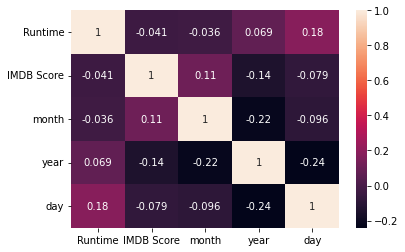

In [102]:
sns.heatmap(Net_df.corr(), annot=True)

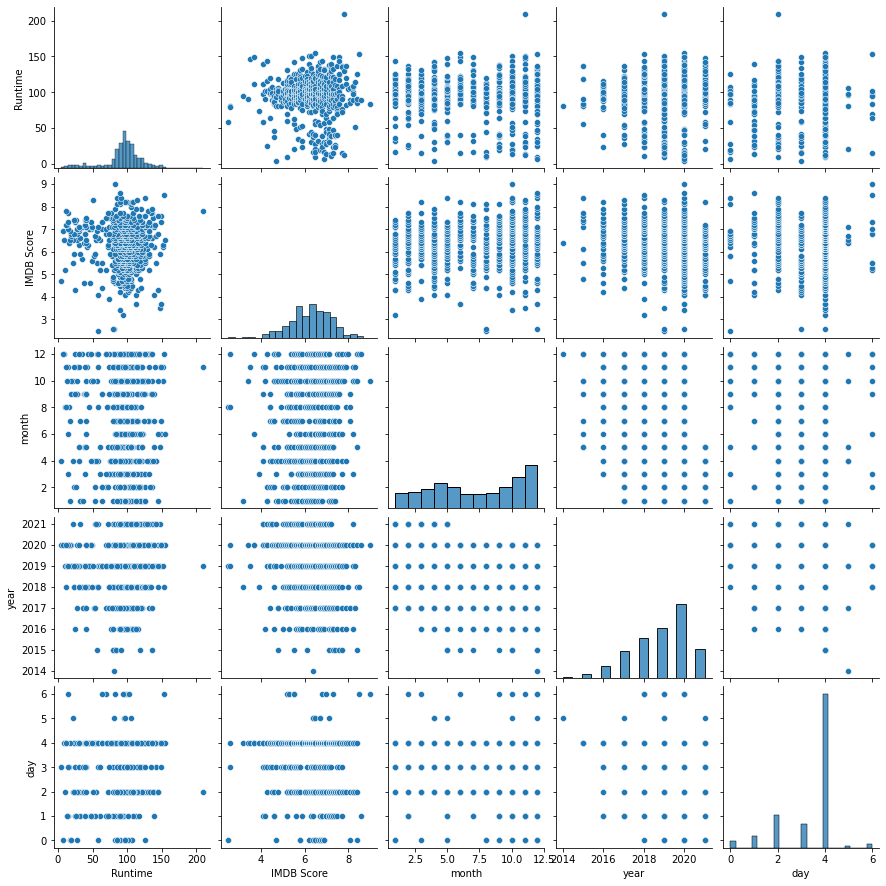

In [223]:
sns.pairplot(Net_df)

No Significant correlation between any two parameters

## IMDB ratings analysis

In [50]:
# Number of values in each genre

Net_df.Genre.value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [132]:

genre_df=Net_df.Genre.value_counts().nlargest(10)



In [133]:
genre_df.index

Index(['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller',
       'Comedy-drama', 'Crime drama', 'Biopic', 'Horror', 'Action'],
      dtype='object')

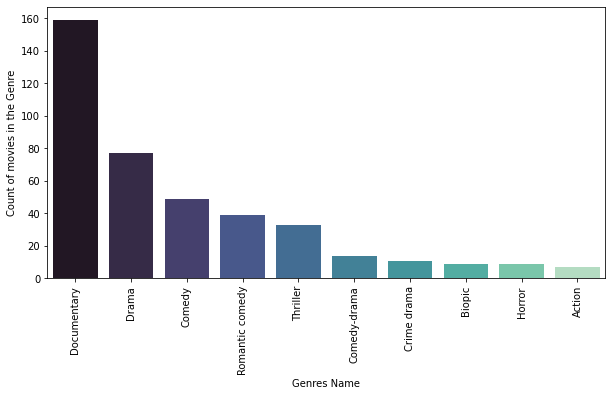

In [134]:
plt.figure(figsize=(10,5))



sns.barplot(x=genre_df.index,y=genre_df.values, palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Genres Name')
plt.ylabel('Count of movies in the Genre')
plt.show()

The chart clearly illustrates the top 10 cinema genres in terms of the number of films made in each. And it is apparent that the documentary film genre is at the top of the list, followed by drama.

### Top genre  based on average IMDB

In [147]:
Newdf = Net_df.groupby('Genre')['IMDB Score'].mean().nlargest(10).to_frame()
Newdf


,IMDB Score
Genre,
Animation/Christmas/Comedy/Adventure,8.200000
Musical / Short,7.700000
Concert Film,7.633333
Anthology/Dark comedy,7.600000
Animation / Science Fiction,7.500000
Making-of,7.450000
Action-adventure,7.300000
Coming-of-age comedy-drama,7.200000
Drama-Comedy,7.200000


In [148]:
Newdf.reset_index()

,Genre,IMDB Score
0,Animation/Christmas/Comedy/Adventure,8.200000
1,Musical / Short,7.700000
2,Concert Film,7.633333
3,Anthology/Dark comedy,7.600000
4,Animation / Science Fiction,7.500000
5,Making-of,7.450000
6,Action-adventure,7.300000
7,Coming-of-age comedy-drama,7.200000
8,Drama-Comedy,7.200000
9,Historical drama,7.200000


<AxesSubplot:ylabel='Genre'>

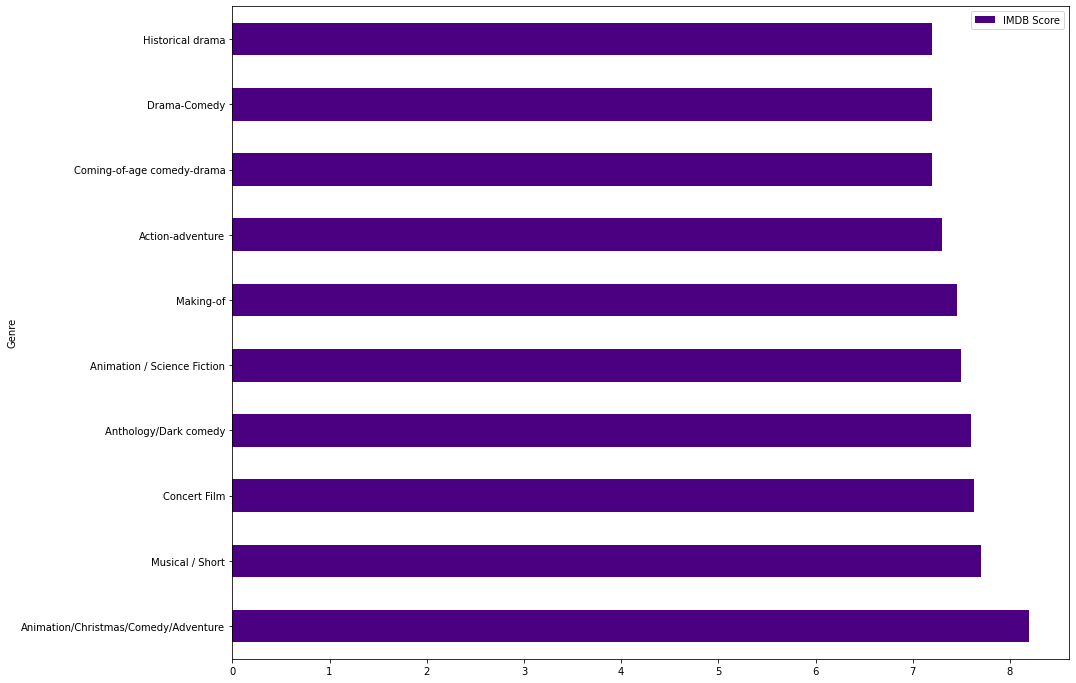

In [253]:
plt.rcParams["figure.figsize"] = [15,12]

# Newdf.plot.barh(rot=0, )
Newdf.plot.barh(rot=0, color = 'indigo')

## Yearly Movie Release Trend

<AxesSubplot:xlabel='year'>

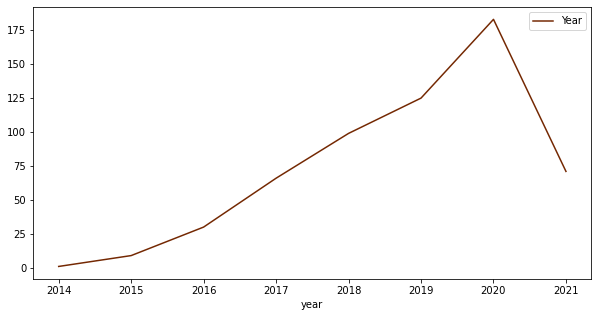

In [183]:
year_df = Net_df.groupby('year').agg(Year = ('year', 'count'))

plt.rcParams["figure.figsize"] = [10,5]

year_df.plot.line(rot=0, color = '#742802')

The figure shows an increase trend in movie count through 2020, followed by a drop in 2021. This might be related to the Covid-19 pandemic impacting movie releases.

## Language vs IMDB

In [207]:
lang_df =Net_df.Language.value_counts().nlargest(10)
lang_df


English       401
Hindi          33
Spanish        31
French         20
Italian        14
Portuguese     12
Indonesian      9
Japanese        6
Korean          6
German          5
Name: Language, dtype: int64

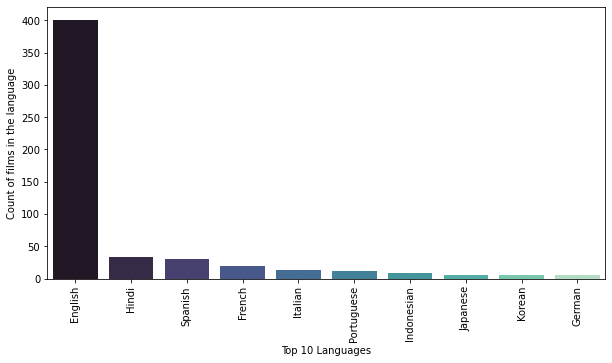

In [215]:
plt.figure(figsize=(10,5))
sns.barplot(x=lang_df.index,y=lang_df.values,palette='mako')
plt.xlabel('Top 10 Languages')
plt.xticks(rotation=90)
plt.ylabel('Count of films in the language')
plt.show()



### Language IMDB ratings

<AxesSubplot:xlabel='Language'>

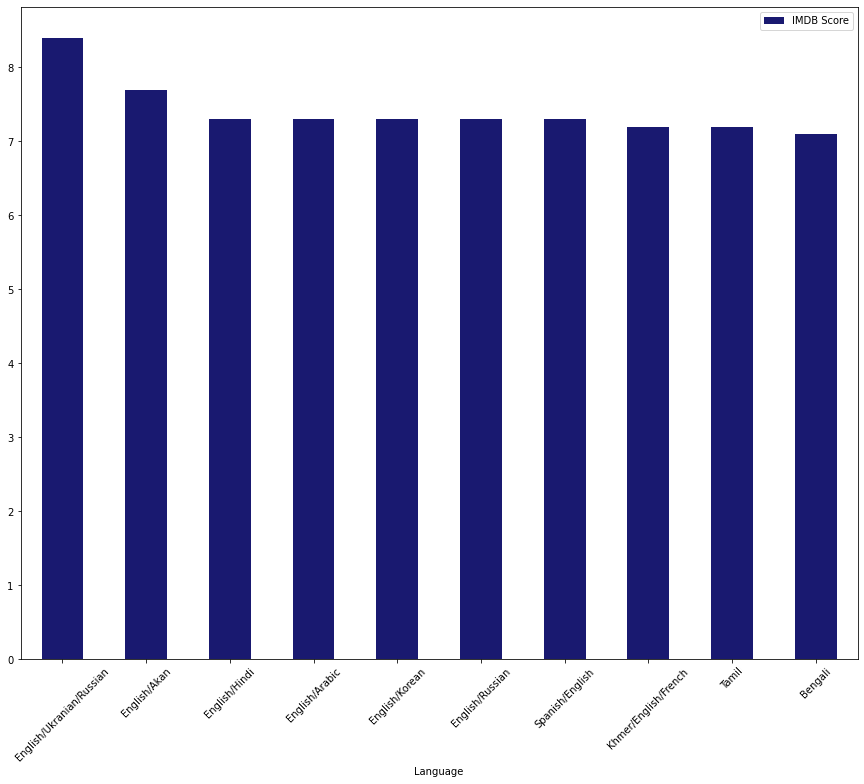

In [214]:
lang = Net_df.groupby('Language')['IMDB Score'].mean().nlargest(10).to_frame()
# Newdf.reset_index()
plt.rcParams["figure.figsize"] = [15,12]

lang.plot.bar(rot=45, color = 'midnightblue')

In [224]:
Net_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4


## Impact of weekday on movie release.

I wanted to see if the weekday on which the film was released had an effect on the quantity of films released.

In [255]:
Net_df['weekday'] = Net_df['Premiere'].dt.day_name()
Net_df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0,Monday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,Friday
5,Drive,Action,2019-11-01,147,3.5,Hindi,11,2019,4,Friday


<AxesSubplot:>

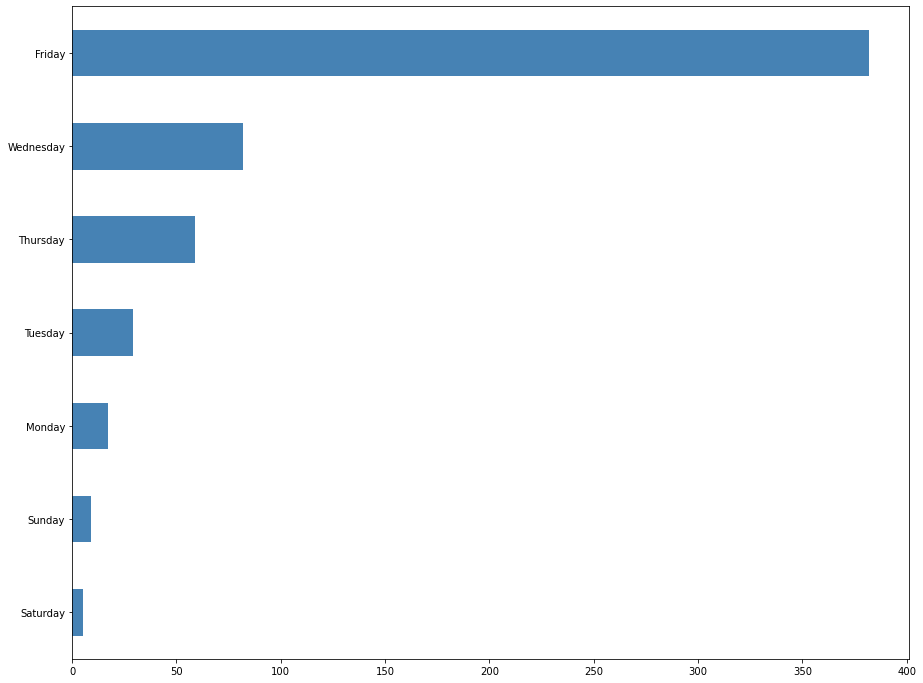

In [254]:

Net_df.weekday.value_counts().sort_values().plot(kind = 'barh', color = 'steelblue')


According to reports, the most films were released on Fridays. The releasers are most likely aiming for a weekend audience.